# Tomato Leaf Detection using VGG19 model
## Very Deep Convolutional Networks for Large-Scale Image Recognition

# Importing all the requirements

In [10]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.layers import Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import callbacks
import tensorflow as tf

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Creating the path

In [11]:
# Define paths
train_path = 'D:/SEMESTER 6/Proyek Data Mining/Model/train'
valid_path = 'D:/SEMESTER 6/Proyek Data Mining/Model/val'

print(os.listdir(train_path))
print("*" * 100)
print(os.listdir(valid_path))

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
****************************************************************************************************
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


In [12]:
folder=(os.listdir(train_path))
folder

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

# Represting the Tomatos

<ul>
    <li><h3>ty : being the type of disease</h3></li>
    <li><h3>index : being the image in the data sets.</h3></li>
</ul>

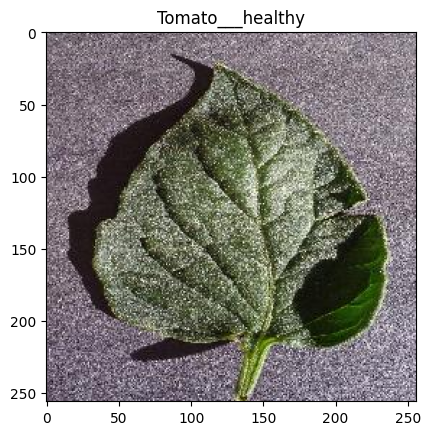

In [13]:
# Visualize a sample image
ty = 2
index = 25
plt.imshow(plt.imread(os.path.join(train_path, folder[ty], os.listdir(os.path.join(train_path, folder[ty]))[index])))
plt.title(folder[ty])
plt.show()

# Load Model

In [14]:
# Load VGG19 model
size = [128, 128]
vgg19 = VGG19(input_shape=size + [3], weights='imagenet', include_top=False)

# Freezing the rest of the layers

In [15]:
for layer in vgg19.layers:
    layer.trainable=False

## Creating the top layer for my desired prediction

In [16]:
x = Flatten()(vgg19.output)
x = Dense(256, activation='relu')(x) 
x = Dropout(0.5)(x) 
prediction = Dense(len(folder), activation='softmax')(x)

model_vgg = Model(inputs=vgg19.input, outputs=prediction)

# Model Summary

In [17]:
model_vgg.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             

 Total params: 22,124,362 (84.40 MB)

 Trainable params: 2,099,978 (8.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

# Compiling the model

In [18]:
plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5,
    patience=2,
    verbose=1,
    mode='min'
)

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [19]:
# Compile the model
model_vgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Data Augmentation

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,  
    width_shift_range=0.2, 
    height_shift_range=0.2,  
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1. / 255)

In [21]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(128, 128),
                                              batch_size=16,
                                              class_mode='categorical',
                                              shuffle=True)
valid_set = valid_datagen.flow_from_directory(valid_path,
                                              target_size=(128, 128),
                                              batch_size=16,
                                              class_mode='categorical',
                                              shuffle=False)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [22]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

# Train the model
history = model_vgg.fit(train_set,
                        validation_data=valid_set,
                        epochs=50,
                        callbacks=[tb_callback, plateau, early_stopping])

Epoch 1/50


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1270s 2s/step - accuracy: 0.2432 - loss: 2.1554 - val_accuracy: 0.5510 - val_loss: 1.3542 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1138s 2s/step - accuracy: 0.3461 - loss: 1.7018 - val_accuracy: 0.6130 - val_loss: 1.1874 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1201s 2s/step - accuracy: 0.3956 - loss: 1.5967 - val_accuracy: 0.6510 - val_loss: 1.1197 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1174s 2s/step - accuracy: 0.3877 - loss: 1.6069 - val_accuracy: 0.6590 - val_loss: 1.0559 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1126s 2s/step - accuracy: 0.4297 - loss: 1.5186 - val_accuracy: 0.6690 - val_loss: 0.9811 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1423s 2s/step - accuracy: 0.4250 - loss: 1.5120 - val_accuracy: 0.6840 - val_loss: 0.9638 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1282s 2s/step - accuracy: 0.4532 - loss: 1.4506

# Visualizing the Fitting of the model

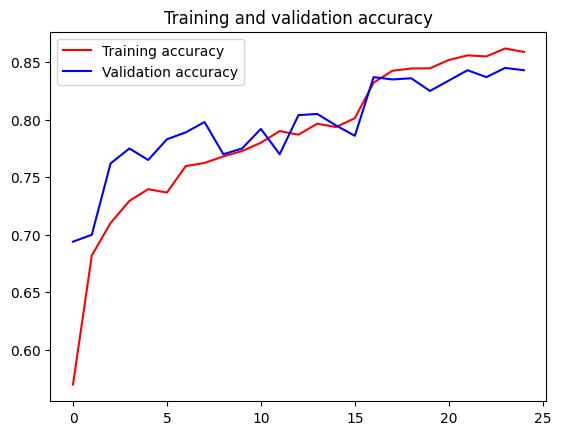

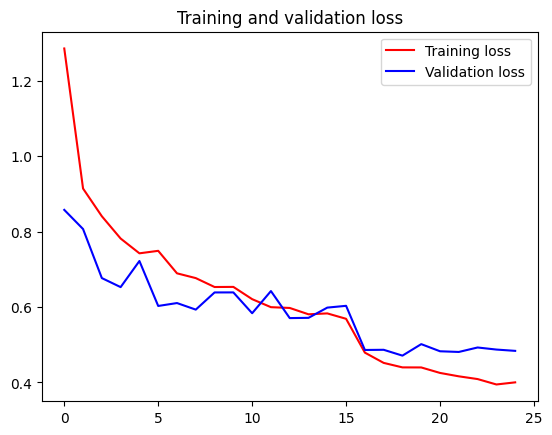

In [ ]:
# Plotting training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Predicting the model

In [ ]:
# Predict on validation set
y_true = valid_set.classes
y_pred = model_vgg.predict(valid_set)
y_pred_classes = np.argmax(y_pred, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step


## Confusion Matrix

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_set.class_indices, yticklabels=valid_set.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# saving the model

In [ ]:
model_vgg.save('fotomatone.h5')

# Checking the prediction of the model

In [ ]:
# Prepare function for image preprocessing
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255.0
    new_array = cv2.resize(img_array, (128, 128))
    return new_array.reshape(-1, 128, 128, 3)

In [ ]:
class_dict=train_set.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [ ]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction)==clss:
            return key

In [ ]:

ty = 9
index = 6

print(folder[ty])
pred = model_vgg.predict(prepare(os.path.join(valid_path, folder[ty], os.listdir(os.path.join(valid_path, folder[ty]))[index])))
predicted_class = prediction_cls(pred)
print(f"Predicted class: {predicted_class}")

Tomato___Tomato_Yellow_Leaf_Curl_Virus
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step
Predicted class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
